In [1]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')


In [2]:
from ESN import Reservoir
from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask
from DATA import MG17

In [3]:
import torch
import numpy
import random

In [4]:
data = MG17(True, [80,10,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

In [5]:
X_TR

tensor([0.0322, 0.0404, 0.0579,  ..., 0.0152, 0.0354, 0.0472],
       dtype=torch.float64)

In [6]:
N = 50

In [7]:
random.seed(10)

In [9]:
unimodal_reservoir = IPReservoir(N=N, bias = False, desired_rho=0.96, mask=IPMask.normalMask(N))
bimodal_reservoir = IPReservoir(N=N, bias = False, desired_rho=0.96, mask=IPMask.mixedBimodalMask(N))
trimodal_reservoir = IPReservoir(N=N, bias = False, desired_rho=0.96, mask=IPMask.trimodal(N, 0.2))


## Unimodal

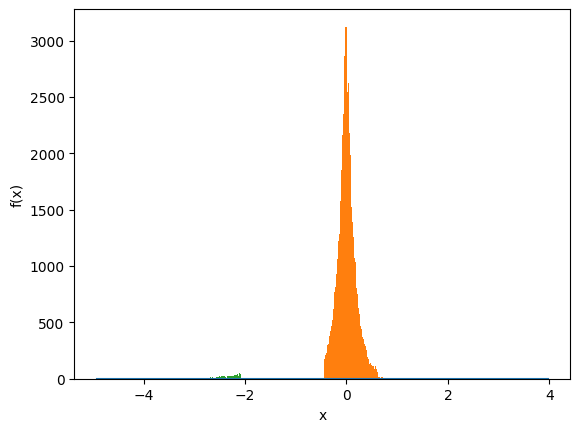

In [10]:
unimodal_reservoir.pre_train(X_VAL, eta=0, epochs=0,  learning_rule="online", verbose=True) #16
unimodal_reservoir.predict(X_VAL, save_gradients=False, save_states=True)
unimodal_reservoir.plot_global_neural_activity()

In [11]:
unimodal_reservoir.pre_train(X_TR, eta=0.000025, epochs=5,  learning_rule="online", verbose=True, debug=False)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 1761.3687744140625.
- Epoch: 2) | KL Divergence value: 2140.61279296875.
- Epoch: 3) | KL Divergence value: 2416.14892578125.
- Epoch: 4) | KL Divergence value: 2630.692626953125.
- Epoch: 5) | KL Divergence value: 2758.4716796875.


No transient applied. Reservoir was already warmed up


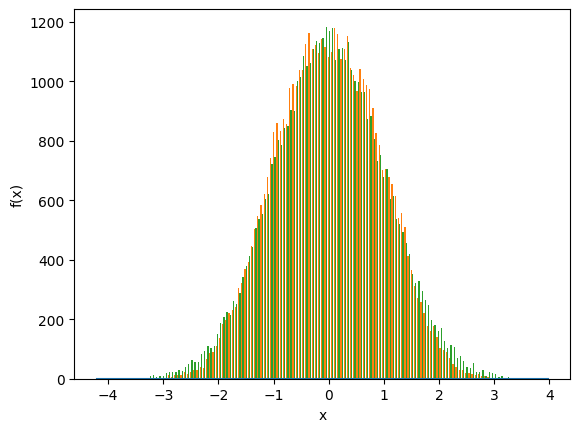

In [12]:
unimodal_reservoir.pre_train(X_VAL, eta=0, epochs=0,  learning_rule="online", verbose=True) #16
unimodal_reservoir.predict(X_VAL, save_gradients=False, save_states=True)
unimodal_reservoir.plot_global_neural_activity()

In [13]:
unimodal_reservoir.de_fi()

0.18795430325222168

In [14]:
unimodal_reservoir.LCE(X_TS)

-0.7285407

## Bimodal

In [119]:
bimodal_reservoir = IPReservoir(N=N, bias = False, desired_rho=0.9, mask=IPMask.mixedBimodalMask(N))

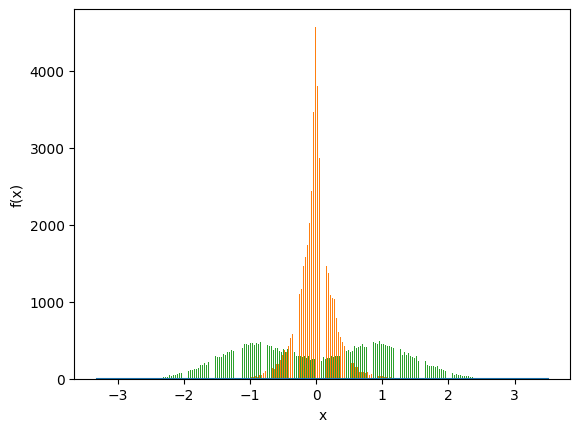

In [120]:
bimodal_reservoir.pre_train(X_VAL, eta=0, epochs=0,  learning_rule="online", verbose=True) #16
bimodal_reservoir.predict(X_VAL, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

In [124]:
bimodal_reservoir.pre_train(X_TR, eta=0.0000005, epochs=10,  learning_rule="online", verbose=True, debug=False)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 2548.950439453125.
- Epoch: 2) | KL Divergence value: 2536.593017578125.
- Epoch: 3) | KL Divergence value: 2524.514892578125.
- Epoch: 4) | KL Divergence value: 2512.70849609375.
- Epoch: 5) | KL Divergence value: 2501.167724609375.
- Epoch: 6) | KL Divergence value: 2489.886962890625.
- Epoch: 7) | KL Divergence value: 2478.86328125.
- Epoch: 8) | KL Divergence value: 2468.08935546875.
- Epoch: 9) | KL Divergence value: 2457.560791015625.
- Epoch: 10) | KL Divergence value: 2447.2724609375.


No transient applied. Reservoir was already warmed up


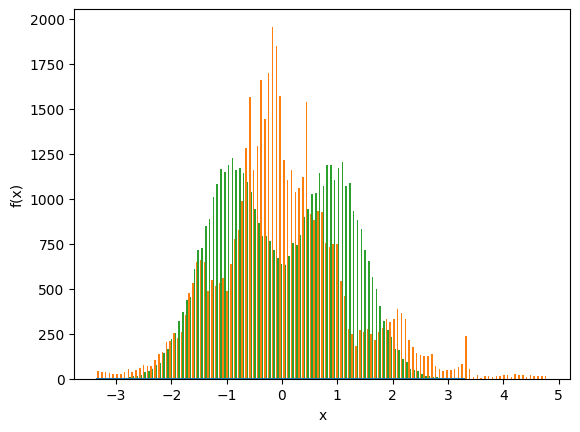

In [125]:
bimodal_reservoir.pre_train(X_VAL, eta=0, epochs=0,  learning_rule="online", verbose=True) #16
bimodal_reservoir.predict(X_VAL, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

In [126]:
bimodal_reservoir.LCE(X_TS)

-0.54990244

In [127]:
bimodal_reservoir.de_fi()

0.22629430864173725

## Trimodal

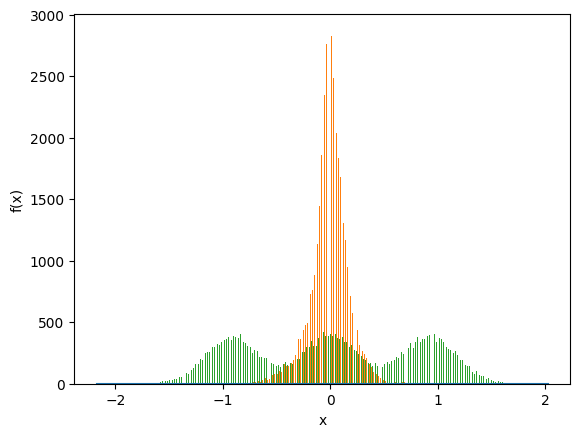

In [35]:
trimodal_reservoir.pre_train(X_VAL, eta=0, epochs=0,  learning_rule="online", verbose=True) #16
trimodal_reservoir.predict(X_VAL, save_gradients=False, save_states=True)
trimodal_reservoir.plot_global_neural_activity()

In [48]:
trimodal_reservoir.pre_train(X_TR, eta=0.000000005, epochs=5,  learning_rule="online", verbose=True, debug=False)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 1005.3807983398438.
- Epoch: 2) | KL Divergence value: 1005.7596435546875.
- Epoch: 3) | KL Divergence value: 1006.1383666992188.
- Epoch: 4) | KL Divergence value: 1006.516845703125.
- Epoch: 5) | KL Divergence value: 1006.895263671875.


No transient applied. Reservoir was already warmed up


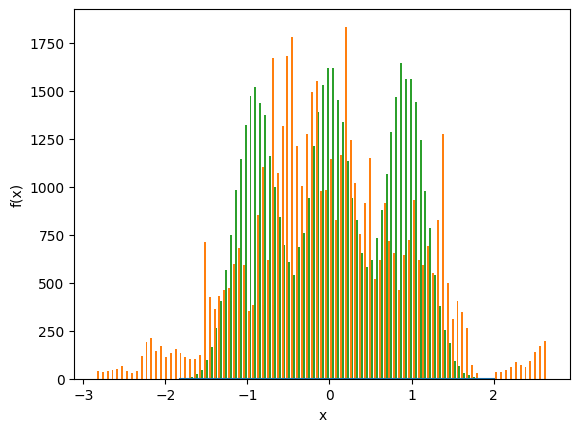

In [49]:
trimodal_reservoir.pre_train(X_VAL, eta=0, epochs=0,  learning_rule="online", verbose=True)
trimodal_reservoir.predict(X_VAL, save_gradients=False, save_states=True)
trimodal_reservoir.plot_global_neural_activity()

In [50]:
trimodal_reservoir.LCE(X_TS)


-0.015928132

In [51]:
trimodal_reservoir.de_fi()


0.0740119727813974